# Data Normalization and Scaling

This notebook demonstrates normalization techniques applied to numerical features to prepare the dataset for analysis.

## Workflow
- Identify numerical columns
- Apply normalization
- Compare values before and after transformation

In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 154.4 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 87.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df.loc[df.duplicated(keep=False)]

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat


In [13]:
import re 
def clean_text(s):
    s = str(s).strip() 
    s = re.sub(r'\u200b\u200c\u200d\uFEFF]', '',s) 
    s = s.lower() 
    return s 

df_clean = df.map(clean_text) 

for col in df_clean.columns: 
    duplicates_in_col = df_clean[df_clean.duplicated(subset=[col])] 
    print(f" col: {col}") 
    print(f" number of duplicates: {len(duplicates_in_col)}") 
    if len(duplicates_in_col) > 0: 
        print (duplicates_in_col[[col]]) 
    print("-" * 40) 

 col: ResponseId
 number of duplicates: 0
----------------------------------------
 col: MainBranch
 number of duplicates: 65432
                           MainBranch
1      i am a developer by profession
2      i am a developer by profession
4      i am a developer by profession
7               i am learning to code
8         i code primarily as a hobby
...                               ...
65432  i am a developer by profession
65433  i am a developer by profession
65434  i am a developer by profession
65435  i am a developer by profession
65436     i code primarily as a hobby

[65432 rows x 1 columns]
----------------------------------------
 col: Age
 number of duplicates: 65429
                      Age
4         18-24 years old
5      under 18 years old
6         35-44 years old
7         18-24 years old
8         45-54 years old
...                   ...
65432     18-24 years old
65433     25-34 years old
65434     25-34 years old
65435     18-24 years old
65436     18-24 years o

In [15]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0   

In [50]:
df["CodingActivities"].isnull().sum()

np.int64(65437)

In [9]:
df_bfill = df['CodingActivities'].bfill()  # يأخذ القيمة التالية
df_bfill

0                                                    Hobby
1        Hobby;Contribute to open-source projects;Other...
2        Hobby;Contribute to open-source projects;Other...
3                             I don’t code outside of work
4                             I don’t code outside of work
                               ...                        
65432                        Hobby;School or academic work
65433             Hobby;Contribute to open-source projects
65434                                                Hobby
65435    Hobby;Contribute to open-source projects;Profe...
65436                                                  NaN
Name: CodingActivities, Length: 65437, dtype: object

In [10]:
df['CodingActivities'].isnull().sum()

np.int64(10971)

In [66]:
df_C = df["CodingActivities"].fillna("Unknown") 
df_C 

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
65432    Unknown
65433    Unknown
65434    Unknown
65435    Unknown
65436    Unknown
Name: CodingActivities, Length: 65437, dtype: object

In [119]:
df_clean = df[(df["ConvertedCompYearly"] > 0) & (df["ConvertedCompYearly"] < 500000)] 
df_clean

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Unknown,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN,0.0053,0.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Unknown,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,NaN,NaN,86155.287263,NaN,0.0053,0.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Unknown,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,86155.287263,NaN,0.0053,0.0
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,Unknown,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,Too long,Easy,86155.287263,NaN,0.0053,0.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,Unknown,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too short,Easy,86155.287263,NaN,0.0053,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Unknown,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN,0.0053,0.0
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN,0.0053,0.0
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Unknown,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN,0.0053,0.0
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Unknown,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,NaN,NaN,86155.287263,NaN,0.0053,0.0


In [90]:
df_comp = df["ConvertedCompYearly"].isnull().sum()
df_comp

np.int64(42002)

In [122]:
value_R = df_clean["ConvertedCompYearly"].mode()
df_clean["ConvertedCompYearly"].fillna(value_R)

0        86155.287263
1        86155.287263
2        86155.287263
3        86155.287263
4        86155.287263
             ...     
65432    86155.287263
65433    86155.287263
65434    86155.287263
65435    86155.287263
65436    86155.287263
Name: ConvertedCompYearly, Length: 65288, dtype: float64

In [115]:
min_val = df["ConvertedCompYearly"].min() 
max_val = df["ConvertedCompYearly"].max() 

df["ConvertedCompYearly_MinMax"] = (df["ConvertedCompYearly"] - min_val) / (max_val - min_val) 
df["ConvertedCompYearly_MinMax"]


0        0.0053
1        0.0053
2        0.0053
3        0.0053
4        0.0053
          ...  
65432    0.0053
65433    0.0053
65434    0.0053
65435    0.0053
65436    0.0053
Name: ConvertedCompYearly_MinMax, Length: 65437, dtype: float64

In [105]:
col = "ConvertedCompYearly" 
z_col = "ConvertedCompYearly_Zscore" 

df[col] = df[col].fillna(df[col].median()) 

mean_val = df[col].mean() 
std_val = df[col].std() 

df[z_col] = (df[col] - mean_val) / std_val 

df[[col,z_col]].head(10) 

,ConvertedCompYearly,ConvertedCompYearly_Zscore
0,86155.287263,0.0
1,86155.287263,0.0
2,86155.287263,0.0
3,86155.287263,0.0
4,86155.287263,0.0
5,86155.287263,0.0
6,86155.287263,0.0
7,86155.287263,0.0
8,86155.287263,0.0
9,86155.287263,0.0


In [107]:
df["ConvertedCompYearly"].describe()

count    6.543700e+04
mean     8.615529e+04
std      1.117614e+05
min      1.000000e+00
25%      8.615529e+04
50%      8.615529e+04
75%      8.615529e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

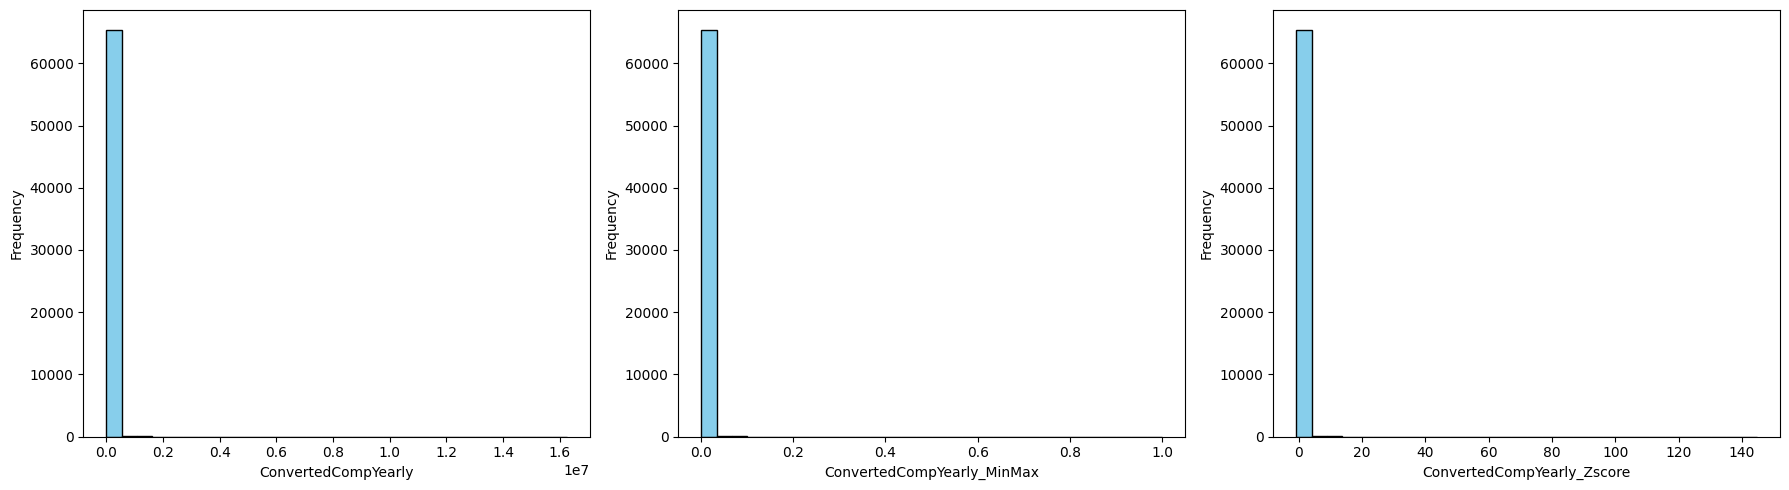

In [116]:
import matplotlib.pyplot as plt 

columns = ["ConvertedCompYearly", "ConvertedCompYearly_MinMax", "ConvertedCompYearly_Zscore"] 

plt.figure(figsize=(18,5)) 

for i, col in enumerate(columns): 
    plt.subplot(1, 3, i+1) 
    plt.hist(df[col], bins=30, color= 'skyblue', edgecolor= 'black') 
    plt.xlabel(col) 
    plt.ylabel("Frequency") 

plt.tight_layout() 
plt.show() 
    

In [117]:
df["ConvertedCompYearly"].describe() 
df["ConvertedCompYearly_MinMax"].describe() 
df["ConvertedCompYearly_Zscore"].describe()  

count    6.543700e+04
mean     1.085842e-17
std      1.000000e+00
min     -7.708772e-01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.446873e+02
Name: ConvertedCompYearly_Zscore, dtype: float64